In [1]:
import pandas as pd


🧩 Step 1: Import Libraries & Load Data

In [35]:
df = pd.read_csv("train.csv")

In [36]:
df.info()
# df.memory_usage(deep=True).sum() / 1024

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observation: (🧩 Step 1: Import Libraries & Load Data)
Total Columns : 12
Total Rows: 891
Missing Value Column: Age, Cabin and Embarked 
Float Data Types: 
Int64 Data Types:
Text Base (Categorical) Data Types: 5
Toal Memory of dataset:285.609375 KB

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# df['Alone'] = (df['SibSp'] + df['Parch'] == 0)
# df['Alone'].mean()


Observation: 
There are total 891 Passengers in Titanic
Average age of persons is 30 apprximately
Highest Fare of titanic is 512 and average is 32
There are only three type of classes for passengers
60% of the persons who were alone
Mostly 3rd class were provdied to passengers
There may be chance of outliers in Fare

🔍 Step 2: Data Quality Check (Initial Cleaning)

In [39]:
(df.isnull().sum() / len(df)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.select_dtypes(include=['float64', 'int64']).skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [43]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Observation: (🔍 Step 2: Data Quality Check (Initial Cleaning))
Missing Value Column in Age: 19.865320 %
Suggestion for Imputation: Use Mean as Skew value is 0.389108

Missing Value Column in Cabin: 77.104377 %
Too high; consider dropping or extracting Deck information if useful.

Missing Value Column in Embarked:0.224467 %
Suggestion for Imputation: Minor missing values — impute with mode (‘S’) before encoding.

There is no duplication in the dataset (All rows are unique)

Step 3: Univariate Analysis (Single Feature at a Time)


📊 Analyzing Column: Age
Mean: 29.70
Median: 28.00
Mode: 24.0
Standard Deviation: 14.53
Range: 0.42 → 80.00 (Total Range = 79.58)
±1 STD Range: 15.17 → 44.23 | 72.3% data
±2 STD Range: 0.65 → 58.75 | 95.9% data
Q1: 20.12, Q3: 38.00, IQR: 17.88
Outlier Boundaries: -6.69 → 64.81
Total Outliers: 11


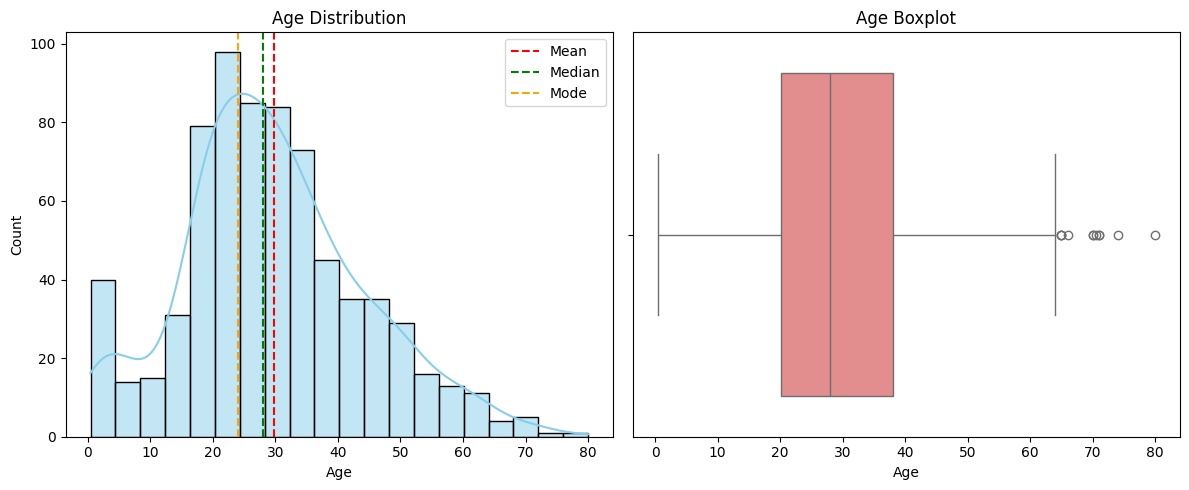


🧠 Observation Summary:
- Distribution Shape: Check visually (Histogram)
- Mean ≈ 29.7, Median ≈ 28.0, Mode ≈ 24.0
- Spread: Range 79.6, Std 14.5, IQR 17.9
- Outliers detected: 11
- About 72.3% data lies within ±1 STD and 95.9% within ±2 STD


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def analyze_numeric_column(df, column_name):
    """
    Perform complete univariate analysis on a numeric column:
    - Summary statistics (mean, median, mode, std, range, IQR)
    - ±1 and ±2 standard deviation range + percentages
    - Outlier detection (IQR method)
    - Visualization: Histogram (with KDE) and Boxplot
    """

    # ---- 1️⃣ Basic Info ----
    print(f"\n📊 Analyzing Column: {column_name}")
    col = df[column_name].dropna()  # Remove NaN if any

    # ---- 2️⃣ Central Tendency ----
    mean = col.mean()
    median = col.median()
    mode = col.mode()[0]
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode: {mode}")

    # ---- 3️⃣ Spread / Variability ----
    std = col.std()
    min_val, max_val = col.min(), col.max()
    range_val = max_val - min_val
    print(f"Standard Deviation: {std:.2f}")
    print(f"Range: {min_val:.2f} → {max_val:.2f} (Total Range = {range_val:.2f})")

    # ---- 4️⃣ ±1 STD and ±2 STD coverage ----
    low1, high1 = mean - std, mean + std
    low2, high2 = mean - (2 * std), mean + (2 * std)
    within_1std = col[(col >= low1) & (col <= high1)]
    within_2std = col[(col >= low2) & (col <= high2)]
    pct_1std = len(within_1std) * 100 / len(col)
    pct_2std = len(within_2std) * 100 / len(col)

    print(f"±1 STD Range: {low1:.2f} → {high1:.2f} | {pct_1std:.1f}% data")
    print(f"±2 STD Range: {low2:.2f} → {high2:.2f} | {pct_2std:.1f}% data")

    # ---- 5️⃣ IQR and Outliers ----
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = col[(col < lower_bound) | (col > upper_bound)]
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Outlier Boundaries: {lower_bound:.2f} → {upper_bound:.2f}")
    print(f"Total Outliers: {len(outliers)}")

    # ---- 6️⃣ Visualization ----
    plt.figure(figsize=(12, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(col, kde=True, color='skyblue')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.axvline(median, color='green', linestyle='--', label='Median')
    plt.axvline(mode, color='orange', linestyle='--', label='Mode')
    plt.title(f'{column_name} Distribution')
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, color='lightcoral')
    plt.title(f'{column_name} Boxplot')

    plt.tight_layout()
    plt.show()

    # ---- 7️⃣ Summary Observation ----
    print("\n🧠 Observation Summary:")
    print(f"- Distribution Shape: Check visually (Histogram)")
    print(f"- Mean ≈ {mean:.1f}, Median ≈ {median:.1f}, Mode ≈ {mode}")
    print(f"- Spread: Range {range_val:.1f}, Std {std:.1f}, IQR {IQR:.1f}")
    print(f"- Outliers detected: {len(outliers)}")
    print(f"- About {pct_1std:.1f}% data lies within ±1 STD and {pct_2std:.1f}% within ±2 STD")

analyze_numeric_column(df, 'Age')

Observation for Age Column:
Distribution : (Skewed: Right)
Central Tendency (Mean (average age of persons):30)
There are 30 passenger with 24.0 year age
Spread / Variability (  std: 
                        range: 0.42 to 80 year old passenger (range is 80)
                        IQR:Middle 50% of passengers with range of  20.125 to 38
                        58% of passenger are in this range 15 to 44
                        77% of passenger are in this range 1 to 59
                        )
Total no of Outliers (unusual values): 11 



📊 Analyzing Column: Pclass
Mean: 2.31
Median: 3.00
Mode: 3
Standard Deviation: 0.84
Range: 1.00 → 3.00 (Total Range = 2.00)
±1 STD Range: 1.47 → 3.14 | 75.8% data
±2 STD Range: 0.64 → 3.98 | 100.0% data
Q1: 2.00, Q3: 3.00, IQR: 1.00
Outlier Boundaries: 0.50 → 4.50
Total Outliers: 0


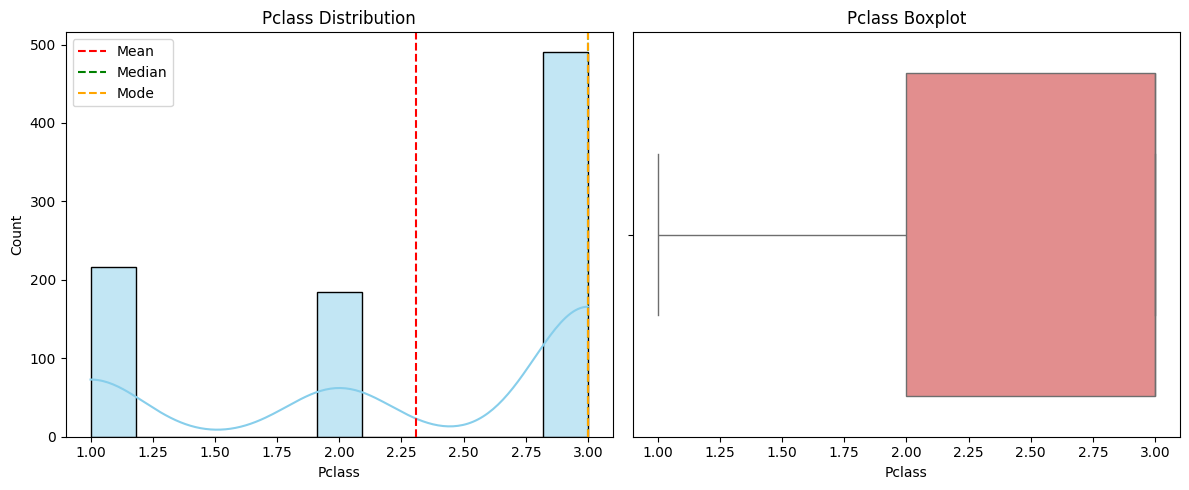


🧠 Observation Summary:
- Distribution Shape: Check visually (Histogram)
- Mean ≈ 2.3, Median ≈ 3.0, Mode ≈ 3
- Spread: Range 2.0, Std 0.8, IQR 1.0
- Outliers detected: 0
- About 75.8% data lies within ±1 STD and 100.0% within ±2 STD


In [12]:
analyze_numeric_column(df, 'Pclass')


📊 Analyzing Column: SibSp
Mean: 0.52
Median: 0.00
Mode: 0
Standard Deviation: 1.10
Range: 0.00 → 8.00 (Total Range = 8.00)
±1 STD Range: -0.58 → 1.63 | 91.7% data
±2 STD Range: -1.68 → 2.73 | 94.8% data
Q1: 0.00, Q3: 1.00, IQR: 1.00
Outlier Boundaries: -1.50 → 2.50
Total Outliers: 46


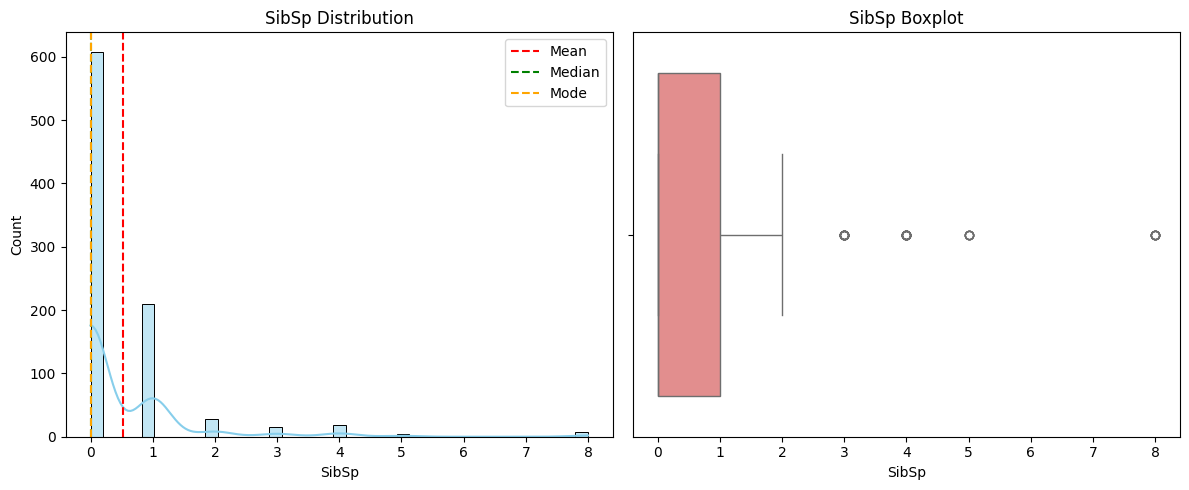


🧠 Observation Summary:
- Distribution Shape: Check visually (Histogram)
- Mean ≈ 0.5, Median ≈ 0.0, Mode ≈ 0
- Spread: Range 8.0, Std 1.1, IQR 1.0
- Outliers detected: 46
- About 91.7% data lies within ±1 STD and 94.8% within ±2 STD


In [13]:
analyze_numeric_column(df, 'SibSp')


📊 Analyzing Column: Parch
Mean: 0.38
Median: 0.00
Mode: 0
Standard Deviation: 0.81
Range: 0.00 → 6.00 (Total Range = 6.00)
±1 STD Range: -0.42 → 1.19 | 89.3% data
±2 STD Range: -1.23 → 1.99 | 89.3% data
Q1: 0.00, Q3: 0.00, IQR: 0.00
Outlier Boundaries: 0.00 → 0.00
Total Outliers: 213


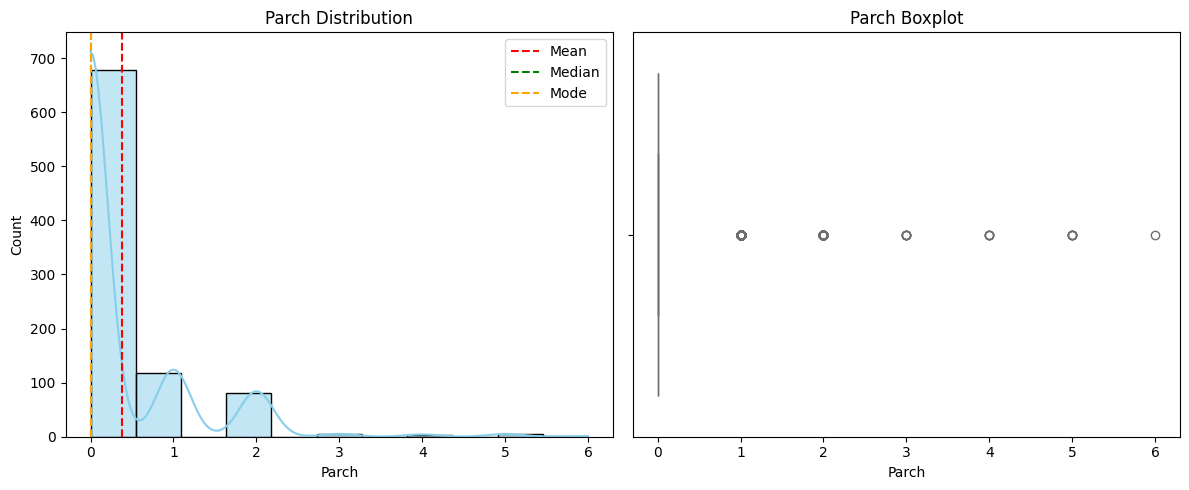


🧠 Observation Summary:
- Distribution Shape: Check visually (Histogram)
- Mean ≈ 0.4, Median ≈ 0.0, Mode ≈ 0
- Spread: Range 6.0, Std 0.8, IQR 0.0
- Outliers detected: 213
- About 89.3% data lies within ±1 STD and 89.3% within ±2 STD


In [46]:
analyze_numeric_column(df, 'Parch')


📊 Analyzing Column: Fare
Mean: 32.20
Median: 14.45
Mode: 8.05
Standard Deviation: 49.69
Range: 0.00 → 512.33 (Total Range = 512.33)
±1 STD Range: -17.49 → 81.90 | 91.8% data
±2 STD Range: -67.18 → 131.59 | 95.7% data
Q1: 7.91, Q3: 31.00, IQR: 23.09
Outlier Boundaries: -26.72 → 65.63
Total Outliers: 116


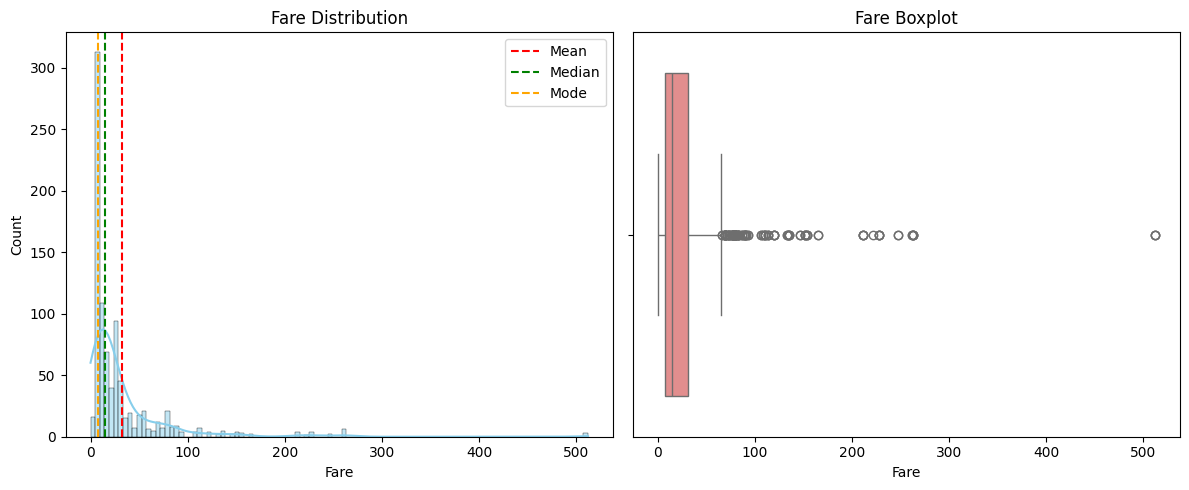


🧠 Observation Summary:
- Distribution Shape: Check visually (Histogram)
- Mean ≈ 32.2, Median ≈ 14.5, Mode ≈ 8.05
- Spread: Range 512.3, Std 49.7, IQR 23.1
- Outliers detected: 116
- About 91.8% data lies within ±1 STD and 95.7% within ±2 STD


In [15]:
analyze_numeric_column(df, 'Fare')

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_categorical_column(df, column_name):
    """
    Analyze a categorical column in a DataFrame.
    
    This function prints key statistics such as:
    - Frequency count of each category
    - Dominant (mode) category
    - Percentage share of each category
    - Missing or rare categories
    - Visualizations (Count Plot and Pie Chart)
    """

    print(f"📊 Categorical Analysis for Column: '{column_name}'\n")

    # Check if column exists in DataFrame
    if column_name not in df.columns:
        print("❌ Column not found in the DataFrame.")
        return
    
    # Drop missing values temporarily for analysis
    col_data = df[column_name].dropna()

    # Frequency count of each category
    freq_count = col_data.value_counts()
    print("🔹 Frequency count of each category:\n", freq_count, "\n")

    # Dominant (most common) category
    dominant_category = col_data.mode()[0]
    print(f"🏆 Dominant (mode) category: {dominant_category}\n")

    # Proportion or percentage share of each category
    percentage_share = col_data.value_counts(normalize=True) * 100
    print("📈 Percentage share of each category:\n", percentage_share.round(2), "\n")

    # Missing values count
    missing_count = df[column_name].isna().sum()
    print(f"❗ Missing values: {missing_count}\n")

    # Identify rare categories (less than 5% of total)
    rare_categories = percentage_share[percentage_share < 5].index.tolist()
    if rare_categories:
        print("⚠️ Rare categories (<5%):", rare_categories, "\n")
    else:
        print("✅ No rare categories found.\n")

    # --- Visualization Section ---
    plt.figure(figsize=(12, 5))

    # 1️⃣ Count Plot
    plt.subplot(1, 2, 1)
    sns.countplot(x=column_name, data=df, order=freq_count.index, palette="coolwarm")
    plt.title(f"Count Plot of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # 2️⃣ Pie Chart
    plt.subplot(1, 2, 2)
    plt.pie(freq_count, labels=freq_count.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("coolwarm", len(freq_count)))
    plt.title(f"Pie Chart of {column_name}")

    plt.tight_layout()
    plt.show()

    print("✅ Visualization complete.\n")

    # Summary Observation
    print("📋 Summary Observation:")
    print(f"- Total unique categories: {col_data.nunique()}")
    print(f"- Most frequent category: '{dominant_category}' with {freq_count.iloc[0]} occurrences.")
    print(f"- Rare categories (<5%): {rare_categories}")


📊 Categorical Analysis for Column: 'Cabin'

🔹 Frequency count of each category:
 Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64 

🏆 Dominant (mode) category: B96 B98

📈 Percentage share of each category:
 Cabin
G6             1.96
C23 C25 C27    1.96
B96 B98        1.96
F2             1.47
D              1.47
               ... 
E17            0.49
A24            0.49
C50            0.49
B42            0.49
C148           0.49
Name: proportion, Length: 147, dtype: float64 

❗ Missing values: 687

⚠️ Rare categories (<5%): ['G6', 'C23 C25 C27', 'B96 B98', 'F2', 'D', 'E101', 'C22 C26', 'F33', 'C83', 'C123', 'B28', 'D26', 'B58 B60', 'E33', 'D33', 'C52', 'F G73', 'B77', 'C93', 'B5', 'D17', 'E24', 'E8', 'E121', 'B35', 'E44', 'C92', 'C78', 'B20', 'C125', 'E67', 'D35', 'F4', 'C2', 'D36', 'C65', 'C124', 'B18', '

C:\Users\Faisal Zamir\AppData\Local\Temp\ipykernel_7172\605179195.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, order=freq_count.index, palette="coolwarm")


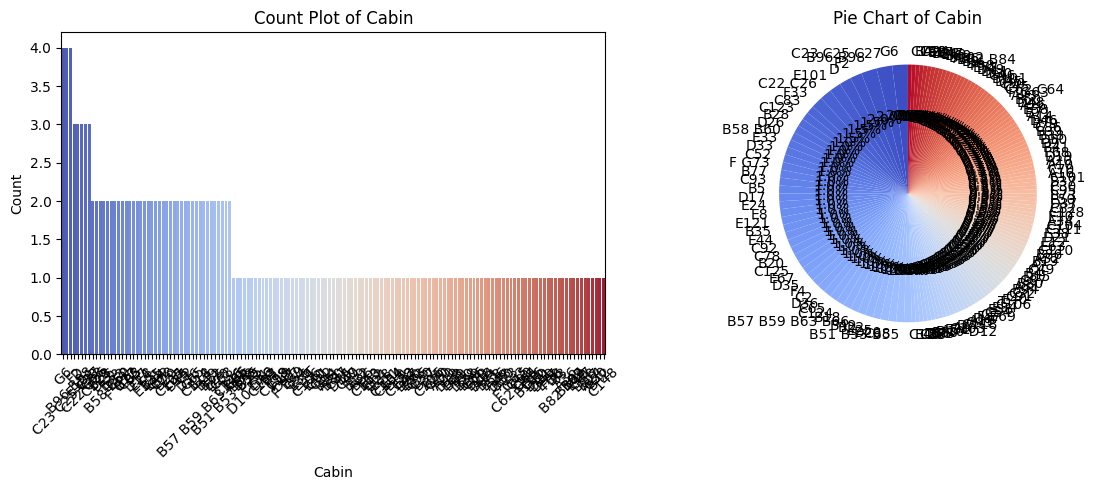

✅ Visualization complete.

📋 Summary Observation:
- Total unique categories: 147
- Most frequent category: 'B96 B98' with 4 occurrences.
- Rare categories (<5%): ['G6', 'C23 C25 C27', 'B96 B98', 'F2', 'D', 'E101', 'C22 C26', 'F33', 'C83', 'C123', 'B28', 'D26', 'B58 B60', 'E33', 'D33', 'C52', 'F G73', 'B77', 'C93', 'B5', 'D17', 'E24', 'E8', 'E121', 'B35', 'E44', 'C92', 'C78', 'B20', 'C125', 'E67', 'D35', 'F4', 'C2', 'D36', 'C65', 'C124', 'B18', 'B57 B59 B63 B66', 'B49', 'B22', 'E25', 'D20', 'C68', 'B51 B53 B55', 'C126', 'E46', 'C85', 'D56', 'B78', 'B30', 'D10 D12', 'A5', 'E31', 'C103', 'A6', 'D7', 'C118', 'C99', 'A19', 'D47', 'F E69', 'C7', 'C54', 'E36', 'E34', 'C106', 'T', 'E40', 'C91', 'C32', 'B94', 'A31', 'B80', 'C87', 'D15', 'B4', 'C49', 'A7', 'B19', 'A32', 'B86', 'C110', 'E63', 'E12', 'D21', 'E38', 'C111', 'C104', 'A34', 'E10', 'C128', 'C82', 'D37', 'E50', 'B73', 'C95', 'C30', 'B37', 'C101', 'A16', 'C70', 'A10', 'A20', 'D19', 'E68', 'B41', 'D9', 'D50', 'B38', 'B39', 'C86', 'B79', '

In [49]:
analyze_categorical_column(df, 'Cabin')

📊 Categorical Analysis for Column: 'Embarked'

🔹 Frequency count of each category:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64 

🏆 Dominant (mode) category: S

📈 Percentage share of each category:
 Embarked
S    72.44
C    18.90
Q     8.66
Name: proportion, dtype: float64 

❗ Missing values: 2

✅ No rare categories found.



C:\Users\Faisal Zamir\AppData\Local\Temp\ipykernel_7172\605179195.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, order=freq_count.index, palette="coolwarm")


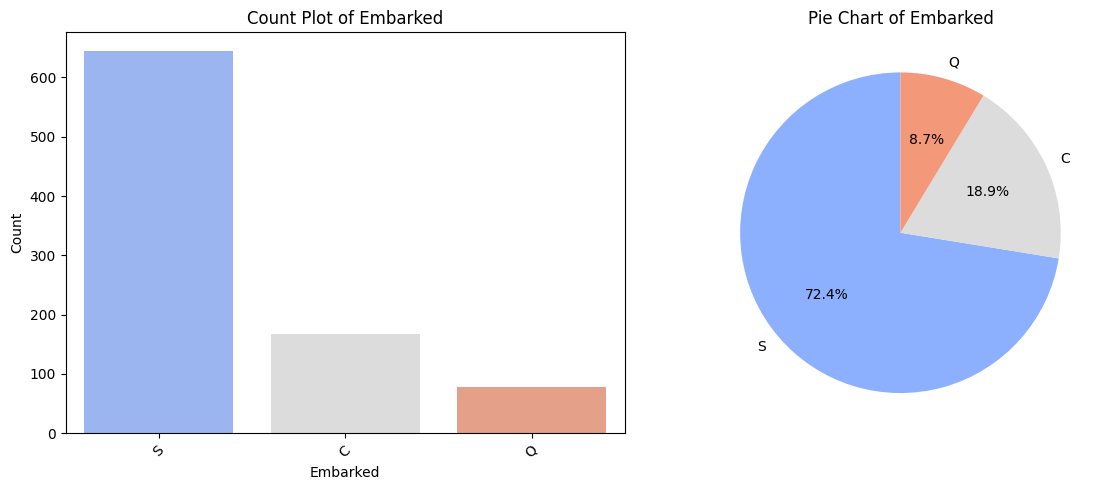

✅ Visualization complete.

📋 Summary Observation:
- Total unique categories: 3
- Most frequent category: 'S' with 644 occurrences.
- Rare categories (<5%): []


In [18]:
analyze_categorical_column(df, 'Embarked')

📊 Categorical Analysis for Column: 'Ticket'

🔹 Frequency count of each category:
 Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64 

🏆 Dominant (mode) category: 1601

📈 Percentage share of each category:
 Ticket
347082              0.79
1601                0.79
CA. 2343            0.79
3101295             0.67
CA 2144             0.67
                    ... 
PC 17590            0.11
17463               0.11
330877              0.11
373450              0.11
STON/O2. 3101282    0.11
Name: proportion, Length: 681, dtype: float64 

❗ Missing values: 0

⚠️ Rare categories (<5%): ['347082', '1601', 'CA. 2343', '3101295', 'CA 2144', '347088', '382652', 'S.O.C. 14879', '113760', '19950', '349909', '347077', '4133', '2666', '113781', '17421', 'W./C. 6608', 'L

C:\Users\Faisal Zamir\AppData\Local\Temp\ipykernel_7172\605179195.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, order=freq_count.index, palette="coolwarm")


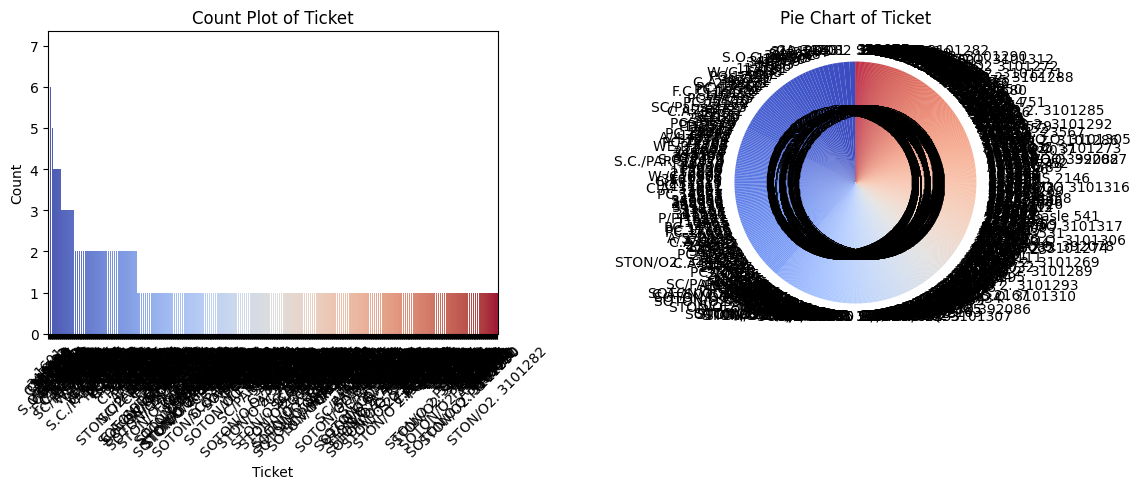

✅ Visualization complete.

📋 Summary Observation:
- Total unique categories: 681
- Most frequent category: '1601' with 7 occurrences.
- Rare categories (<5%): ['347082', '1601', 'CA. 2343', '3101295', 'CA 2144', '347088', '382652', 'S.O.C. 14879', '113760', '19950', '349909', '347077', '4133', '2666', '113781', '17421', 'W./C. 6608', 'LINE', 'PC 17757', '363291', '347742', 'C.A. 31921', '239853', '13502', 'PC 17760', 'PC 17582', 'F.C.C. 13529', '110152', '110413', 'PC 17755', '371110', 'PC 17572', '24160', 'SC/Paris 2123', '248727', 'C.A. 34651', '345773', '29106', '230080', '35273', 'PC 17569', 'PP 9549', '113572', '36973', '26360', '36947', 'PC 17604', '113789', 'A/4 48871', '376564', '12749', 'PC 17761', '2908', 'WE/P 5735', '2651', '11668', '220845', '345764', '358585', '392096', 'S.O./P.P. 3', 'S.C./PARIS 2079', '17474', '29750', '54636', '19996', '2659', '113806', '250647', 'W./C. 6607', '16966', '3101278', 'C.A. 2315', '231919', 'PC 17611', '111361', 'C.A. 37671', '2691', '2661'

In [19]:
analyze_categorical_column(df, 'Ticket')

📊 Categorical Analysis for Column: 'Name'

🔹 Frequency count of each category:
 Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64 

🏆 Dominant (mode) category: Abbing, Mr. Anthony

📈 Percentage share of each category:
 Name
Dooley, Mr. Patrick                                    0.11
Braund, Mr. Owen Harris                                0.11
Cumings, Mrs. John Bradley (Florenc

C:\Users\Faisal Zamir\AppData\Local\Temp\ipykernel_7172\605179195.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, order=freq_count.index, palette="coolwarm")
C:\Users\Faisal Zamir\AppData\Local\Temp\ipykernel_7172\605179195.py:66: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


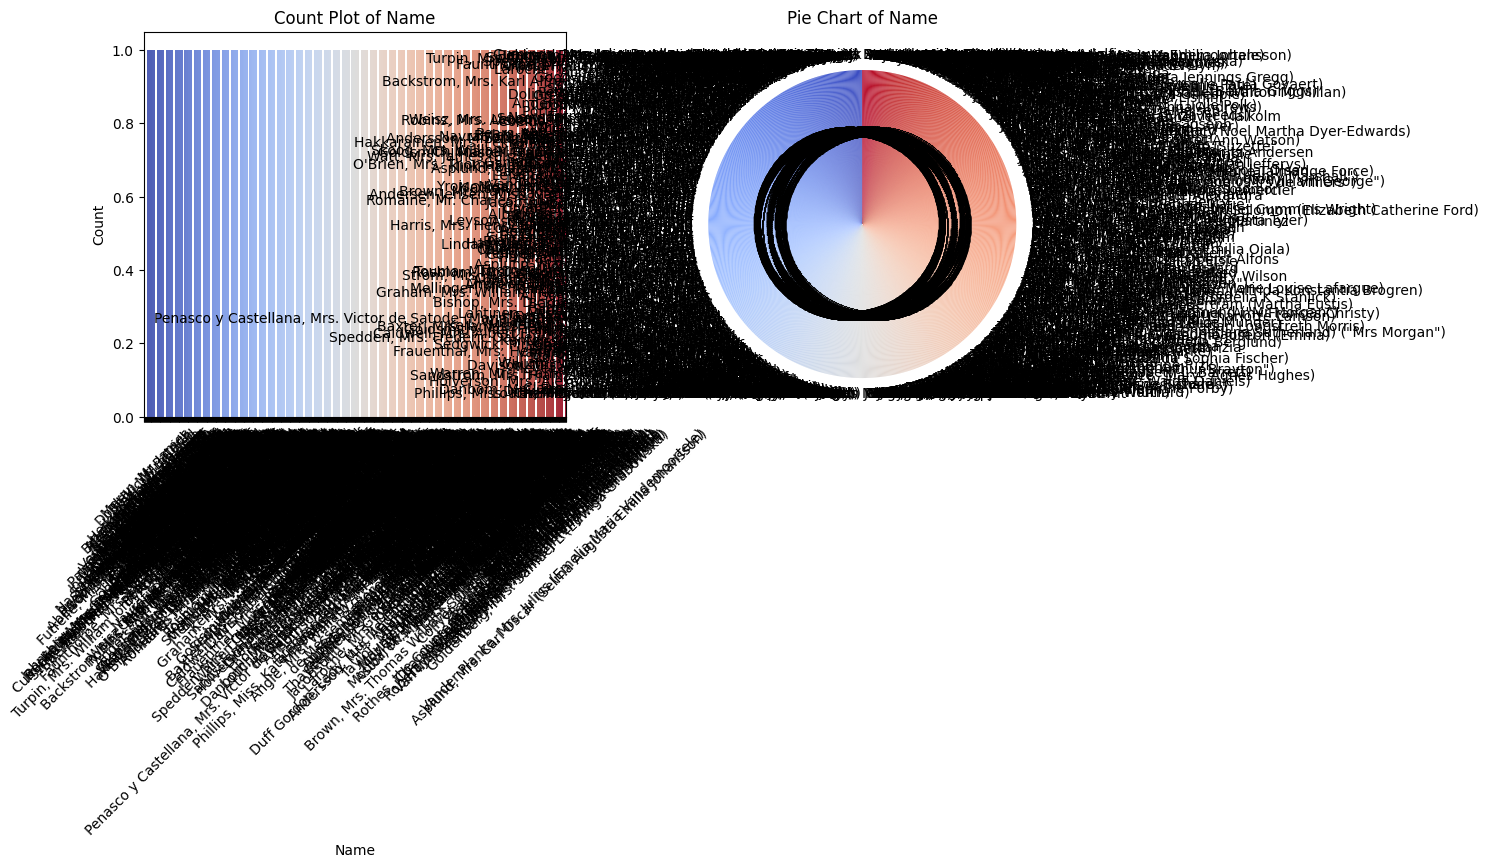

✅ Visualization complete.

📋 Summary Observation:
- Total unique categories: 891
- Most frequent category: 'Abbing, Mr. Anthony' with 1 occurrences.
- Rare categories (<5%): ['Dooley, Mr. Patrick', 'Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'Nasser, Mrs. Nicholas (Adele Achem)', 'Abelson, Mrs. Samuel (Hannah Wizosky)', 'Vander Cruyssen, Mr. Victor', 'Carlsson, Mr. Frans Olof', 'Beckwith, Mrs. Richard Leonard (Sallie Monypeny)', 'Balkic, Mr. Cerin', 'Johnson, Master. Harold Theodor', 'van Melkebeke, Mr. Philemon', 'Roebling, Mr. Washington Augustus II', 'Duran y More, Miss. Asuncion', 'Bystrom, Mrs. (Karolina)', 'Gill, Mr. John William', 'Sage, Miss. Dorothy Edith "Dolly"', 'Swift, Mrs. Frederick Joel (Margaret Welle

In [51]:
analyze_categorical_column(df, 'Name')

📊 Categorical Analysis for Column: 'Sex'

🔹 Frequency count of each category:
 Sex
male      577
female    314
Name: count, dtype: int64 

🏆 Dominant (mode) category: male

📈 Percentage share of each category:
 Sex
male      64.76
female    35.24
Name: proportion, dtype: float64 

❗ Missing values: 0

✅ No rare categories found.



C:\Users\Faisal Zamir\AppData\Local\Temp\ipykernel_7172\605179195.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, order=freq_count.index, palette="coolwarm")


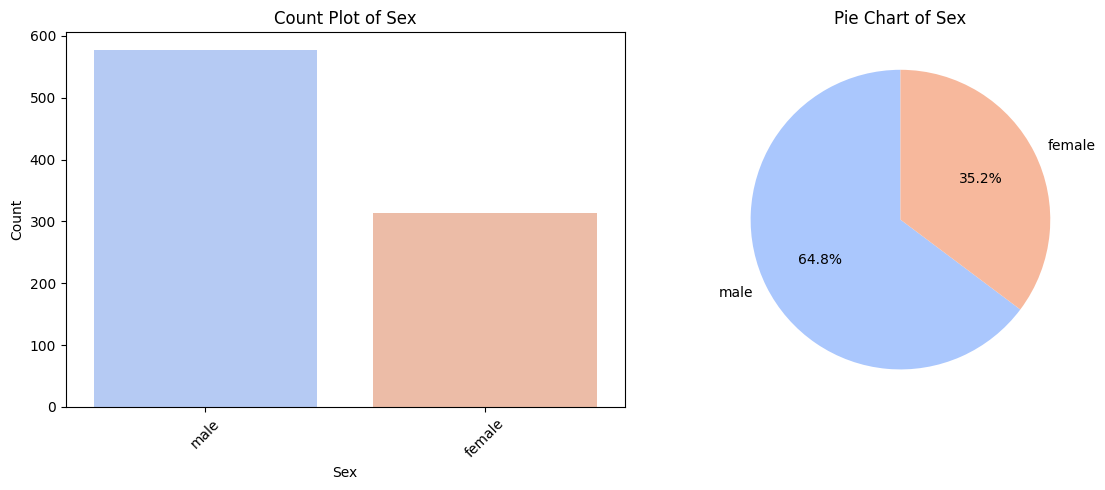

✅ Visualization complete.

📋 Summary Observation:
- Total unique categories: 2
- Most frequent category: 'male' with 577 occurrences.
- Rare categories (<5%): []


In [21]:
analyze_categorical_column(df, 'Sex')

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_binary_column(df, column_name):
    """
    Analyze a binary column (e.g., 0/1, Yes/No, Male/Female) in a DataFrame.

    This function shows:
    - Count of each class
    - Percentage distribution
    - Missing values
    - Class imbalance check
    - Visualizations (bar + pie)
    """

    print(f"⚙️ Binary Column Analysis for '{column_name}'\n")

    # 1️⃣ Validate if column exists
    if column_name not in df.columns:
        print("❌ Column not found in the DataFrame.")
        return

    # Drop missing values temporarily
    col_data = df[column_name].dropna()

    # 2️⃣ Count of each class
    class_counts = col_data.value_counts()
    print("🔹 Count of each class:\n", class_counts, "\n")

    # 3️⃣ Percentage distribution of each class
    class_percentage = col_data.value_counts(normalize=True) * 100
    print("📊 Percentage share of each class:\n", class_percentage.round(2), "\n")

    # 4️⃣ Missing value count
    missing_count = df[column_name].isna().sum()
    print(f"❗ Missing values: {missing_count}\n")

    # 5️⃣ Check for class imbalance (if one class >60% of data)
    max_class = class_percentage.max()
    if max_class > 60:
        print(f"⚠️ Class Imbalance Detected: One class represents {max_class:.2f}% of the data.\n")
    else:
        print("✅ Classes appear balanced.\n")

    # --- Visualization Section ---
    plt.figure(figsize=(12, 5))

    # 1️⃣ Bar Plot (Count Plot)
    plt.subplot(1, 2, 1)
    sns.countplot(x=column_name, data=df, palette="Set2")
    plt.title(f"Bar Plot of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Count")

    # 2️⃣ Pie Chart
    plt.subplot(1, 2, 2)
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, 
            colors=sns.color_palette("Set2", len(class_counts)))
    plt.title(f"Pie Chart of {column_name}")

    plt.tight_layout()
    plt.show()

    print("✅ Visualization complete.\n")

    # --- Summary Observation ---
    print("📋 Summary Observation:")
    print(f"- Unique classes: {class_counts.index.tolist()}")
    print(f"- Class counts: {class_counts.to_dict()}")
    print(f"- Class proportions (%): {class_percentage.round(2).to_dict()}")
    print(f"- Missing values: {missing_count}")
    if max_class > 60:
        print("⚠️ Class imbalance detected — consider balancing this column before modeling.")
    else:
        print("✅ Data is reasonably balanced between both classes.")


⚙️ Binary Column Analysis for 'Survived'

🔹 Count of each class:
 Survived
0    549
1    342
Name: count, dtype: int64 

📊 Percentage share of each class:
 Survived
0    61.62
1    38.38
Name: proportion, dtype: float64 

❗ Missing values: 0

⚠️ Class Imbalance Detected: One class represents 61.62% of the data.



C:\Users\Faisal Zamir\AppData\Local\Temp\ipykernel_7172\2936495524.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column_name, data=df, palette="Set2")


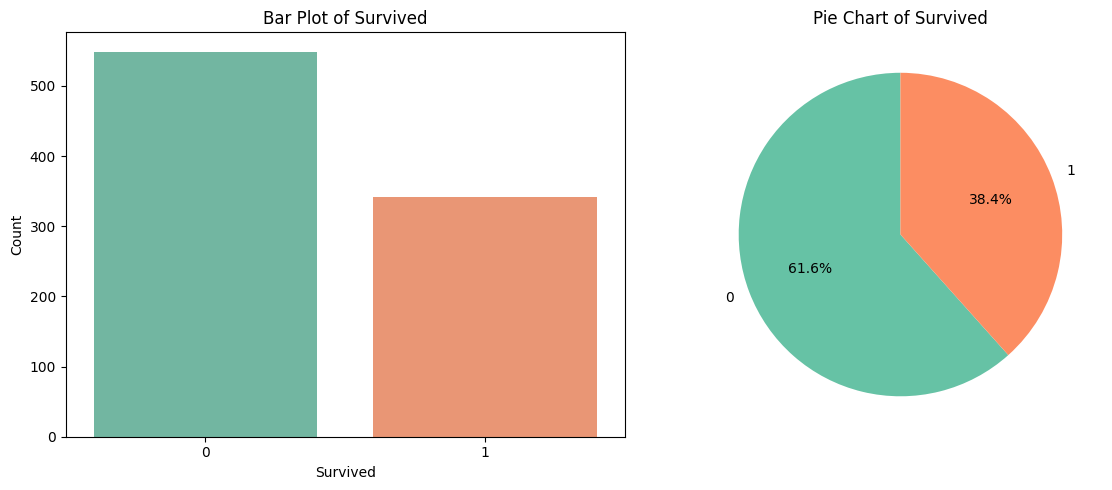

✅ Visualization complete.

📋 Summary Observation:
- Unique classes: [0, 1]
- Class counts: {0: 549, 1: 342}
- Class proportions (%): {0: 61.62, 1: 38.38}
- Missing values: 0
⚠️ Class imbalance detected — consider balancing this column before modeling.


In [23]:
analyze_binary_column(df, 'Survived')

🔗 Step 4: Bivariate Analysis (Feature vs Target)

In [54]:
# Numeric vs Numeric correlation
corr = df['Age'].corr(df['Fare'])
print(corr) # -1 se +1 range 

0.09606669176903894


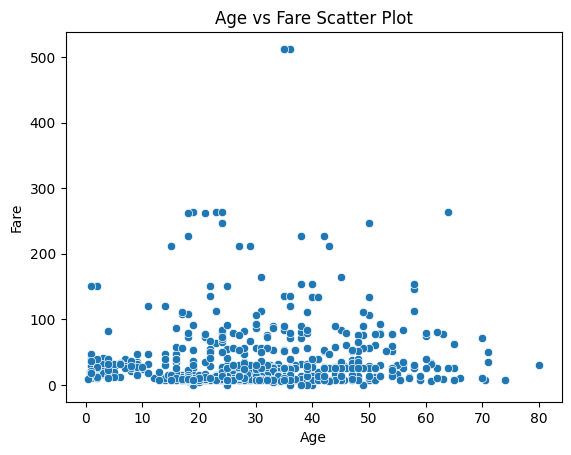

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs Fare Scatter Plot')
plt.show()


In [57]:
# Categorical vs Numeric analysis
df.groupby('Sex')['Fare'].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

C:\Users\Faisal Zamir\AppData\Local\Temp\ipykernel_7172\57185775.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Fare', data=df, palette='coolwarm')


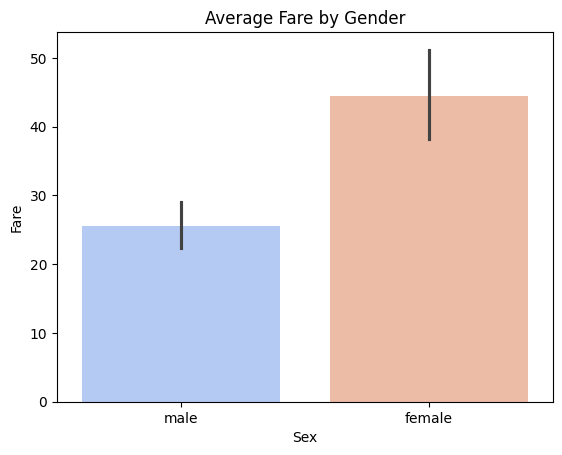

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Sex', y='Fare', data=df, palette='coolwarm')
plt.title('Average Fare by Gender')
plt.show()


Survived    0    1
Sex               
female     81  233
male      468  109
Percentage
Survived      0      1
Sex                   
female    25.80  74.20
male      81.11  18.89


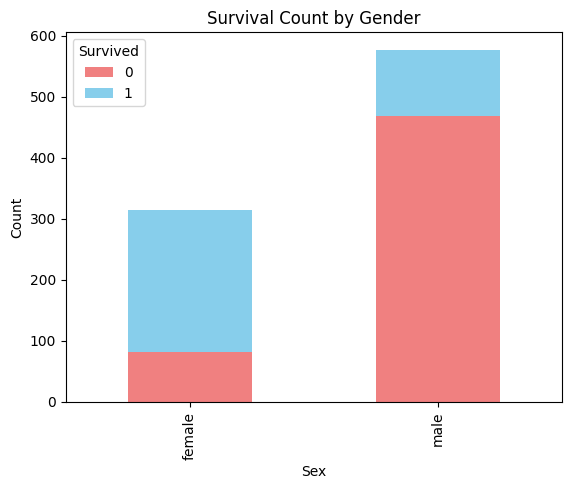

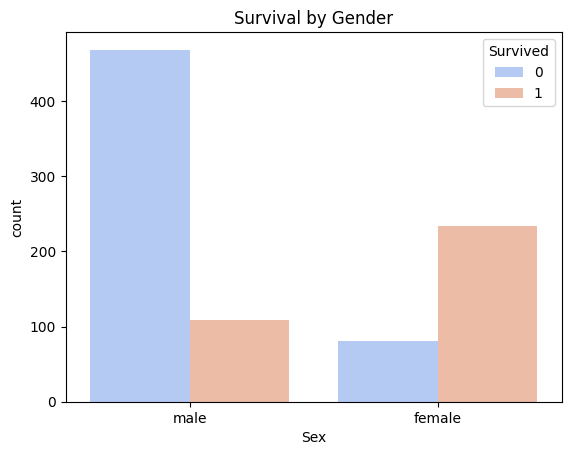

In [60]:
# Categorical vs Categocial
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Count of Survived by Sex
ct = pd.crosstab(df['Sex'], df['Survived'])
print(ct)

# Proportion (%) table
ct_percent = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
print("Percentage")
print(ct_percent.round(2))

# Visualization: Stacked Bar
ct.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Alternative visualization using seaborn
sns.countplot(x='Sex', hue='Survived', data=df, palette='coolwarm')
plt.title('Survival by Gender')
plt.show()


In [63]:
# Binary vs Numeric analysis
Survived_Age_Mean = df.groupby('Survived')['Age'].mean()   # Survived=0 vs 1 ke liye average age
Survived_Age_Median = df.groupby('Survived')['Age'].median() # Median
Survived_Fare_Mean = df.groupby('Survived')['Fare'].mean()

print("Survived Age Mean:", Survived_Age_Mean)
print("Survived Age Median:", Survived_Age_Median)
print("Survived Fare Mean:", Survived_Fare_Mean)


Survived Age Mean: Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
Survived Age Median: Survived
0    28.0
1    28.0
Name: Age, dtype: float64
Survived Fare Mean: Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


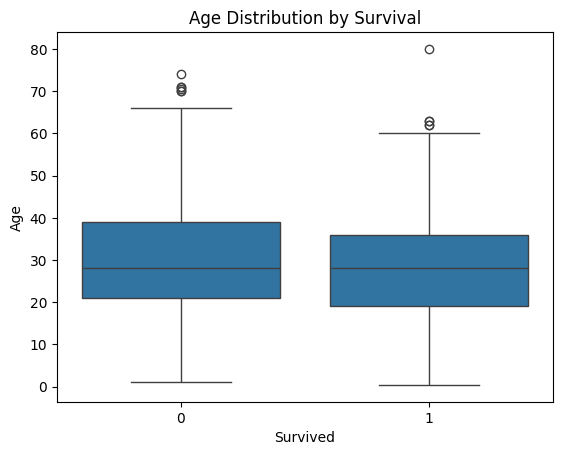

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()


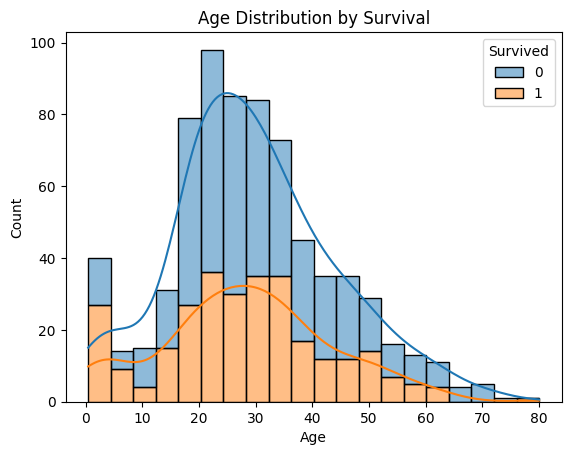

In [65]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title("Age Distribution by Survival")
plt.show()
